# Parcial

Alejandro Mantilla Redondo
201711304

Al entregar la solución de este examen, yo, Alejandro Mantilla con código 201711304 me comprometo a no 
conversar durante el desarrollo de este examen con ninguna persona diferente a los profesores del curso 
sobre aspectos relacionados con el examen; tampoco utilizaré algún medio de comunicación por voz, texto o 
intercambio de archivos, para consultar o compartir con otros, información sobre el tema del examen antes de 
entregarlo. Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer 
fraude en este examen

In [1]:
# Para la lectura y manejo de datos
import pandas as pd
import numpy as np

# Exploración de variables
from pandas_profiling import ProfileReport

# Gráficas y visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Librería para estimar normalidad de datos
import scipy.stats as stats

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split

# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression

# Para calcular prueba t de medias
from scipy.stats import ttest_ind

# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Librería para parámetros polinomiales
from sklearn.preprocessing import PolynomialFeatures

# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 
from statsmodels.api import add_constant

## 1. Lectura, exploración y limpieza de datos

Importamos los datos desde su archivo `.csv`.

In [2]:
# Leemos el archivo .csv
data = pd.read_csv("presion_sistolica.csv", sep = ";")

# Mostramos las primeras 5 filas del DataFrame
display(data.head())

# Identificamos los tipos de cada columna
display(data.dtypes)

# Identificamos la cantidad de registros y columnas
display(data.shape)

# Identificamos si hay duplicado y cuantos
display(data.value_counts())
display(len(data)-len(data.drop_duplicates()))

,id,tazas_cafe,edad,genero,fumador,imc,tc,etnicidad,presion_sis
0,63120,2.0,27.0,Masculino,0,35.600,164.540130,0,136.57
1,42957,1.0,69.0,Femenino,0,23.980,169.683363,0,116.48
2,39221,2.0,40.0,Femenino,0,22.610,113.783536,1,118.85
3,42621,1.0,NaN,Masculino,1,39.995,210.724015,1,139.42
4,26234,2.0,42.0,Masculino,0,35.860,162.950980,1,124.94


id               int64
tazas_cafe     float64
edad           float64
genero          object
fumador          int64
imc            float64
tc             float64
etnicidad        int64
presion_sis    float64
dtype: object

(102515, 9)

id     tazas_cafe  edad  genero     fumador  imc     tc          etnicidad  presion_sis
92156  2.0         30.0  Masculino  0        31.160  202.109342  1          132.11         9
19882  1.0         30.0  Femenino   0        33.200  173.344551  2          105.14         8
48126  4.0         27.0  Femenino   0        41.800  202.627178  1          124.23         8
55521  3.0         42.0  Masculino  0        33.300  155.290342  0          127.75         7
23457  0.0         36.0  Femenino   0        27.835  159.533596  1          111.70         7
                                                                                          ..
19465  3.0         50.0  Masculino  0        32.490  176.042835  1          114.47         1
19472  1.0         26.0  Femenino   0        27.610  222.383486  0          118.21         1
54417  1.0         23.0  Femenino   0        53.130  163.943954  1          104.43         1
54413  3.0         35.0  Masculino  0        19.800  170.977160  1         

38451

In [3]:
# Valores únicos de dos columnas que se sospecha llevan solo enteros
display(data["tazas_cafe"].unique())
display(data["edad"].unique())

array([2., 1., 3., 4., 0., 5., 6.])

array([27.        , 69.        , 40.        ,         nan, 42.        ,
       24.        , 36.        , 47.        , 22.        , 32.        ,
       29.        , 59.        , 21.        , 31.        , 39.        ,
       50.        , 53.        , 20.        , 33.        , 38.        ,
       34.        , 54.        , 48.        , 30.        , 23.        ,
       28.        , 25.        , 26.        , 37.        , 52.        ,
       46.        , 35.        , 44.        , 43.        , 45.        ,
       19.        , 41.        , 18.        , 56.        , 49.        ,
       72.        , 58.        , 55.        , 60.        , 57.        ,
       62.        , 51.        , 48.75523799, 42.73139681, 42.89120429,
       66.        , 63.        , 45.73075111, 46.87211551, 50.5162378 ,
       41.22520136, 43.95756008, 37.50503306, 41.58396767, 50.76169748,
       67.        , 61.        , 48.29530471, 38.29313096, 46.13455   ,
       47.83589975, 34.03648223, 48.6326538 , 48.32747351, 40.85

In [4]:
# Cantidad de datos faltantes por columna
display(data.isna().sum())

# Cantidad de filas con faltantes en todo el DataFrame
display(len(data)-len(data.dropna()))

# Porción de filas con datos faltantes
display((len(data)-len(data.dropna())) / data.shape[0])

id                0
tazas_cafe        0
edad           7042
genero            0
fumador           0
imc            3811
tc                0
etnicidad         0
presion_sis       0
dtype: int64

10589

0.10329220114129639

Notamos en un inicio los siguientes aspectos de los datos:

* Existen registros duplicados. Estos los descartamos.<br><br>

* Existen registros con datos faltantes (solo 10% de los datos). Debido a que la proporción de datos faltantes es baja (menor aún luego de descartar duplicados), los descartamos.<br><br>

* Existe la columna `"id"` que identifica cada registro en los datos, por lo que reemplazamos el `index` por defecto de `pandas`.<br><br>

* Agregamos un identificador binario para la columna `"genero"`.

* Las columnas `"fumador"` y `"etnicidad"` son presentadas como numéricas pese a ser categóricas. Utilizamos diccionarios y el método `DataFrame.map` para agregar nuevas columnas con los valores correspondientes.<br><br>

* La columna `"tazas_cafe"` tiene `dtype` `float64` pese a solo contenter números enteros. Cambiamos su `dtype` a `int64`.<br><br>

* La columna `"edad"`, contiene muchos registros con decimales pero gran parte fueron aproximados a un entero. Por homogeneidad en los datos, truncamos los decimales de todas las edades y convertimos la columna a `dtype` `int64`.<br><br>

* Las columnas tienen nombres difíciles de interpretar. Los reemplazamos por nombres más verbosos.

In [5]:
# Descartamos los registros duplicados
data.drop_duplicates(inplace = True)

# Descartamos los registros con faltantes
data.dropna(inplace = True)

# Fijamos la columnas id como el index del DataFrame
data.set_index("id", inplace = True)

# Nueva columna binaria de género
genero_dict = {"Masculino": 0,
               "Femenino": 1}
data["Género"] = data["genero"].map(genero_dict)

# Nueva columna de fumador textual, basada en la columna binaria
fumador_dict = {0: "No fumador",
                1: "Fumador"}
data["Fumador textual"] = data["fumador"].map(fumador_dict)

# Nueva columna de etnicidad textual, basada en la columna ternaria
etnicidad_dict = {0: "Blanco",
                  1: "Negro",
                  2: "Hispano"}
data["Etnicidad textual"] = data["etnicidad"].map(etnicidad_dict)

# La columna tazas_cafe debe ser tipo int64
data["tazas_cafe"] = data["tazas_cafe"].astype(np.int64)

# La columna edad debe ser tipo int64
data["edad"] = data["edad"].astype(np.int64)

# Cambiamos los nombres de las columnas por versiones más verbosas
cols_dict = {'tazas_cafe': 'Tazas de café al día',
             'edad': 'Edad en años',
             'genero': 'Género textual',
             'fumador': 'Fumador',
             'imc': 'Índice de masa corporal',
             'tc': 'Colesterol en sangre',
             'etnicidad': 'Etnicidad',
             'presion_sis': 'Presión sistólica'}
data.rename(columns = cols_dict, inplace = True)

display(data.head())
display(data.shape)

,Tazas de café al día,Edad en años,Género textual,Fumador,Índice de masa corporal,Colesterol en sangre,Etnicidad,Presión sistólica,Género,Fumador textual,Etnicidad textual
id,,,,,,,,,,,
63120,2,27,Masculino,0,35.60,164.540130,0,136.57,0,No fumador,Blanco
42957,1,69,Femenino,0,23.98,169.683363,0,116.48,1,No fumador,Blanco
39221,2,40,Femenino,0,22.61,113.783536,1,118.85,1,No fumador,Negro
26234,2,42,Masculino,0,35.86,162.950980,1,124.94,0,No fumador,Negro
87179,3,24,Masculino,0,38.06,243.709170,0,120.37,0,No fumador,Blanco


(57476, 11)

Ahora que tenemos datos limpios, identificamos las siguientes características relevantes:

* Los datos faltantes son siempre de las columnas `"edad"` e `"imc"` y coinciden en su mayoría para la misma fila.<br><br>

* Las columnas son todas cuantitativas a excepción del indicador de si la persona fuma, su género y la etnicidad.<br><br>

* De las variables cuantitativas son enteras la cantidad de tazas de café al día y la edad en años. El resto contienen valores decimales.<br><br>

In [6]:
data.columns

Index(['Tazas de café al día', 'Edad en años', 'Género textual', 'Fumador',
       'Índice de masa corporal', 'Colesterol en sangre', 'Etnicidad',
       'Presión sistólica', 'Género', 'Fumador textual', 'Etnicidad textual'],
      dtype='object')

In [7]:
# Nos quedamos por lo pronto con las variables en representación numérica
data_numer = data[['Tazas de café al día', 'Edad en años', 'Fumador',
                   'Índice de masa corporal', 'Colesterol en sangre', 'Etnicidad',
                   'Presión sistólica', 'Género']]
data_numer.head()

,Tazas de café al día,Edad en años,Fumador,Índice de masa corporal,Colesterol en sangre,Etnicidad,Presión sistólica,Género
id,,,,,,,,
63120,2,27,0,35.60,164.540130,0,136.57,0
42957,1,69,0,23.98,169.683363,0,116.48,1
39221,2,40,0,22.61,113.783536,1,118.85,1
26234,2,42,0,35.86,162.950980,1,124.94,0
87179,3,24,0,38.06,243.709170,0,120.37,0


In [45]:
# Realizar el perfilamiento
ProfileReport(data_numer, title = "Perfilamiento de datos")

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

KeyboardInterrupt: 

Identificamos ahora distribuciones de variables únicas e interacciones bivariadas a partir de las indicaciones iniciales de `pandas_profiling`.

<AxesSubplot:>

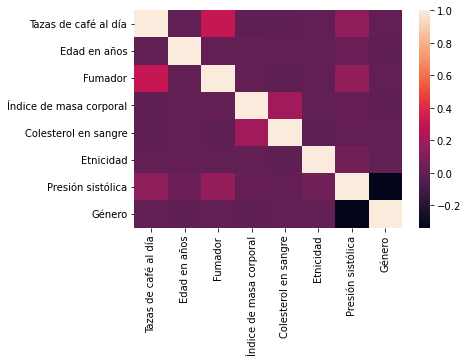

In [9]:
# Diagrama de correlación (mapa de calor)
corr = data_numer.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Del gráfico de correlaciones identificamos solo una leve correlación entre las variables de `"Indice de masa corporal"` `"Colesterol en la sangre"`. Existe una correlación menor aún, pero relativamente alta respecto a los demás pares, entre la `"Presión sistólica"` y `"Tazas de cafe al día"`.

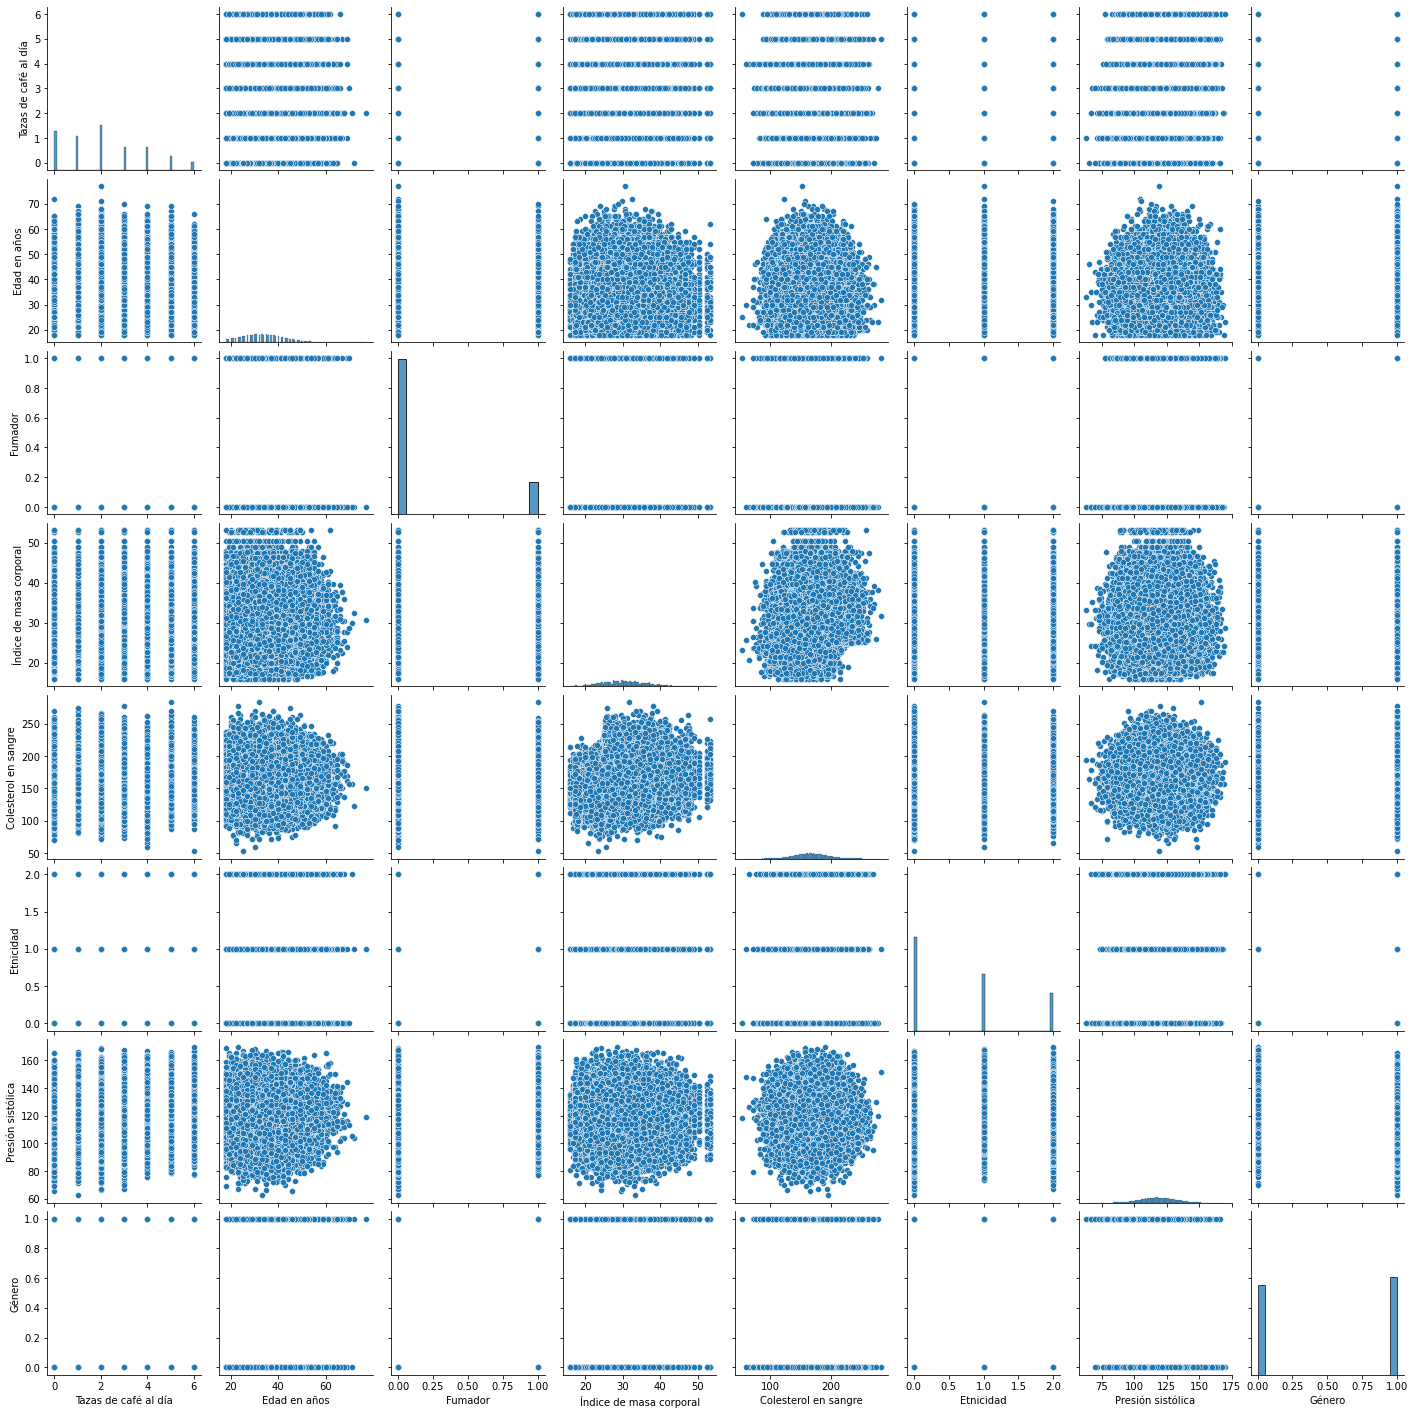

In [10]:
# Distribución de cada variable (histograma en la diagonal) y scatter de todos los pares.
sns.pairplot(data_numer)

Confirmamos nuestra sospecha inicial de que las variables no estás fuertemente correlacionadas entre sí por la falta de tendencias en los scatter, aunque identificamos un grupo aislado de registros para aquellos con indice de masa corporal superior a 50. Esta división en dos de los scatter es evidente en la interacción con cualquier otra variable y en su histograma.

Aunque a mayor cantidad de tazas de café percibimos menor cantidad de valores bajos de presión sistólica, no identificariamos aún una relación entre estas dos variables.

Las variables cuantitativas todas parecen obedecer a una distribución simétrica, aunque estrictamente positiva y apróximadamente normal. Esta validación la confirmamos con el siguiente qqplot.

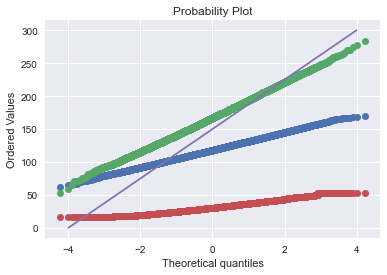

In [11]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1, 1, figsize=(6, 4))


stats.probplot(data_numer["Presión sistólica"], plot = plt, fit = False)
stats.probplot(data_numer["Colesterol en sangre"], plot = plt, fit = False)
stats.probplot(data_numer["Índice de masa corporal"], plot = plt, fit = False)

# Remove the regression lines
ax.get_lines()[1].remove()
ax.get_lines()[2].remove()
ax.get_lines()[3].remove()

# Change colour of scatter
ax.get_lines()[0].set_markerfacecolor('C0')
ax.get_lines()[1].set_markerfacecolor('C1')
ax.get_lines()[2].set_markerfacecolor('C2')

# Add on y=x line
ax.plot([-4, 4], [0, 300], c='C3')

En efecto, aunque la recta carcterística de la distribución normal en el diagrama qq no es perfectamente ajustada a los datos, estos indican una clara tendencia y una linealidad entre los cuantiles teoréticos y los cuantiles observados.

# Pruebas de hipótesis y correlación

$$
H_{0}: \mu_1 = \mu_2
$$
$$
H_{1}: \mu_1 \neq \mu_2
$$

Calculamos inicialmente las pruebas t de los factores de género y fumador. Suponemos un $\alpha$ de 0.05.

Primero que nada, normalizamos los datos con normalización de min-max.

In [12]:
data_numer_norm = (data_numer-data_numer.min())/(data_numer.max()-data_numer.min())

## Género

In [13]:
masculino = data_numer_norm[data_numer_norm['Género'] == 0]['Presión sistólica']
femenino = data_numer_norm[data_numer_norm['Género'] == 1]['Presión sistólica']
print('Promedio masc: '+str(masculino.mean()))
print('Promedio fem: '+str(femenino.mean()))

Promedio masc: 0.5616782975264769
Promedio fem: 0.4780374779792532


In [14]:
#valor de t y p 
ttest,pval = ttest_ind(masculino,femenino)
print('Valor de t: '+str(ttest))
print('Valor p: '+ str(pval))

Valor de t: 86.11854967533128
Valor p: 0.0


In [15]:
# Regla de decisión si el p valor es menor que la significancia escogida 
confianza=0.95
significancia=1-confianza
# Si se tiene menor valor se rechaza la hipótesis nula
if pval<significancia:
    print("Rechazar hipótesis nula")
else:
    print("No rechazar hipótesis nula")

Rechazar hipótesis nula


## Fumador

In [16]:
fumador = data_numer_norm[data_numer_norm['Fumador'] == 1]['Presión sistólica']
no_fumador = data_numer_norm[data_numer_norm['Fumador'] == 0]['Presión sistólica']
print('Promedio masc: '+str(fumador.mean()))
print('Promedio fem: '+str(no_fumador.mean()))

Promedio masc: 0.5610653505164267
Promedio fem: 0.5091371039017009


In [17]:
#valor de t y p 
ttest,pval = ttest_ind(fumador,no_fumador)
print('Valor de t: '+str(ttest))
print('Valor p: '+ str(pval))

Valor de t: 38.36395383431996
Valor p: 0.0


In [18]:
# Regla de decisión si el p valor es menor que la significancia escogida 
confianza=0.95
significancia=1-confianza
# Si se tiene menor valor se rechaza la hipótesis nula
if pval<significancia:
    print("Rechazar hipótesis nula")
else:
    print("No rechazar hipótesis nula")

Rechazar hipótesis nula


Al parecer por su cuenta las variable de género y fumador sí contibuyen a la presión sistólica ya que en ambos casos rechazamos que la media de los niveles sea la misma.

Calculamos ahora la correlación entre la presión sistólica y otras variables.

In [19]:
data_numer_norm.corr()

,Tazas de café al día,Edad en años,Fumador,Índice de masa corporal,Colesterol en sangre,Etnicidad,Presión sistólica,Género
Tazas de café al día,1.000000,-0.002329,0.307827,-0.003675,-0.005675,0.001549,0.142130,0.006756
Edad en años,-0.002329,1.000000,-0.000441,0.007381,0.000871,0.007681,0.032873,-0.003829
Fumador,0.307827,-0.000441,1.000000,0.002207,-0.012366,-0.000372,0.158015,-0.001379
Índice de masa corporal,-0.003675,0.007381,0.002207,1.000000,0.199083,-0.002889,0.012362,-0.007230
Colesterol en sangre,-0.005675,0.000871,-0.012366,0.199083,1.000000,-0.010131,0.001966,-0.001447
Etnicidad,0.001549,0.007681,-0.000372,-0.002889,-0.010131,1.000000,0.047805,-0.002476
Presión sistólica,0.142130,0.032873,0.158015,0.012362,0.001966,0.047805,1.000000,-0.338070
Género,0.006756,-0.003829,-0.001379,-0.007230,-0.001447,-0.002476,-0.338070,1.000000


Coinciden los detalles de esta correlación con los identificados en el HeatMap con anterioridad.

El mayor factor protector de la alta presión es el género, donde existe una correlación negativa si se entiende como una variable ordinal. Masculino = 0, Femenino = 1. El género masculino tiene mayor presión sistólica por correlación y prueba t.

Un factor de riesgo que presenta una correlación es si la persona fuma o no. La correlación positiva indic que una persona fumadora es, en efecto, propensa a una mayor presión sistólica.

Lo mismo sucede con el consumo de tazas de café. Existe una correlación positiva.

La matriz de correlación parece no indicar mayores problemas de multicolinealidad, a excepción de la incidencia de fumadores y alto consumo de tazas de café al día. Esto puede presentar problemas en el análisis ya que las variables correlacionadas en un ejercicio de regresión quebrantan lo supuestos del modelo. Podemos corregir este sesgo si sonsideramos la interacción entre las variables como un factor en el análisis.

# Regresión lineal

De la ecuación $y = \beta_{0} x + \beta_{1}$ quisieramos desarrolla pruebas para las siguientes hipótesis.

$$
H_{0}: \beta_{0} = 0
$$

$$
H_{1}: \beta_{0} \neq 0
$$

## Regresión lineal simple

Realizamos el ejercicio de regresión lineal simple con los datos sin normalizar ya que no existe riesgo de unas variables de magnitud distinta sesgando el peso de otros coeficientes. Realizamos dos modelos, uno con intercepto y otro sin intercepto.

### Sin intercepto

In [29]:
# Se selecciona la variable objetivo, en este caso "TARGET".
Y = data_numer['Presión sistólica']
# Del conjunto de datos se elimina la variable "TARGET".
X = data_numer['Tazas de café al día']
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 0)

In [30]:
# Ajustar el modelo para ver el reporte
model = sm.OLS(Y_train, X_train)
result = model.fit() ## sm.OLS(output, input)
# Mostrar las estadísticas del modelo
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Presión sistólica   R-squared (uncentered):                   0.621
Model:                            OLS   Adj. R-squared (uncentered):              0.621
Method:                 Least Squares   F-statistic:                          7.531e+04
Date:                Thu, 30 Sep 2021   Prob (F-statistic):                        0.00
Time:                        22:05:41   Log-Likelihood:                     -2.6264e+05
No. Observations:               45980   AIC:                                  5.253e+05
Df Residuals:                   45979   BIC:                                  5.253e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Tazas de café al día    33.7695      0.123    274.428      0.000      33.528      34.011
==============================================================================
Omnibus:                     3105.128   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2254.005
Skew:                          -0.441   Prob(JB):                         0.00
Kurtosis:                       2.369   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ya que se trata de variables no normalizadas, podemos usar la interpretación clásica de regresión donde el valor del coeficiente para la variable `"Tazas de café al día"` es el cambio promedio de la variable `"Presión sistólica"` por cada unidad de cambio en la primera. No incluimos una constante en la ecuación de regresión lineal ($y = \beta_{1}$), lo cual nos indicaría que con cero tasas de café, se tendría una presión de cero, lo cual no es factible. El coeficiente de la variable es de 33.76, lo que indica que (en promedio) por cada taza de café al día de más, crece la presión en 33.76.

Vale la pena resaltar que de los dos modelos propuestos para la regresión lineal simple este es un mejor ajuste según el $R^{2}$, aunque no tenga sentido en la realidad.

### Con intercepto

In [27]:
# Se selecciona la variable objetivo, en este caso "TARGET".
Y = data_numer['Presión sistólica']
# Del conjunto de datos se elimina la variable "TARGET".
X = data_numer['Tazas de café al día']
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 0)

X_train = np.array(X_train).reshape(-1, 1)

X_train = add_constant(X_train)

X_test = add_constant(X_test)

/home/alejoman/miniconda3/envs/CDAPy/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
# Ajustar el modelo para ver el reporte
model = sm.OLS(Y_train, X_train)
result = model.fit() ## sm.OLS(output, input)
# Mostrar las estadísticas del modelo
display(result.summary())
display(result.pvalues)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Presión sistólica   R-squared (uncentered):                   0.621
Model:                            OLS   Adj. R-squared (uncentered):              0.621
Method:                 Least Squares   F-statistic:                          7.531e+04
Date:                Thu, 30 Sep 2021   Prob (F-statistic):                        0.00
Time:                        22:14:40   Log-Likelihood:                     -2.6264e+05
No. Observations:               45980   AIC:                                  5.253e+05
Df Residuals:                   45979   BIC:                                  5.253e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Tazas de café al día    33.7695      0.123    274.428      0.000      33.528      34.011
==============================================================================
Omnibus:                     3105.128   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2254.005
Skew:                          -0.441   Prob(JB):                         0.00
Kurtosis:                       2.369   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Tazas de café al día    0.0
dtype: float64

Ya que se trata de variables no normalizadas, podemos usar la interpretación clásica de regresión donde el valor del coeficiente para la variable `"Tazas de café al día"` es el cambio promedio de la variable `"Presión sistólica"` por cada unidad de cambio en la primera. El coeficiente de la variable es 1.09, lo cual indica una muy baja relación lineal e indica que (en promedio) por cada taza de café adicional, crece en una unidad la presión. La constante de la ecuación nos permite identificar que, para una persona que no tome café, la presión promedio será de 115.75.

In [36]:
result.mse_model

403434519.45305806

In [38]:
result.mse_resid

5356.932716752039

In [39]:
result.mse_total

14130.946690661158

Las 3 celdas anteriores muestran distintas medidas de error del modelo ajustado. Las medidas de error parecen elevadas pero carecemos de una referencia exacta para identificar si estas son indicativas de un mal modelo.

Este modelo, pese a tener más sentido en la realidad que el anterior, nos permite un $R^{2}$ muy malo, donde tan solo el 20% de la varianza es explicada por esta variable. Al imprimir el p-value vemos que debemos rechazar la hipótesis nula, lo que nos indica que, aunque el modelo es un ajuste muy malo de dal variables, este es significativo y por lo tanto permite explicar el comportamiento de la variable de respuesta.

## Regresión lineal multivariada

Realizamos el ejercicio de regresión lineal simple con los datos noramlizados ya que existe riesgo de opacar el efecto de algunas variables por la magnitud de algunos de los datos.

El modelo de regresión considerará la siguiente ecuación.
$$
y = \beta_{Tazas}x_{Tazas} + \beta_{Fumador}x_{Fumador} + \beta_{Género}x_{Género} + \beta_{0}
$$

Esta regresión considera solo las variables que presentan una correlación mayor con la variable de respuesta.

In [43]:
# Se selecciona la variable objetivo, en este caso "TARGET".
Y = data_numer['Presión sistólica']
# Del conjunto de datos se elimina la variable "TARGET".
X = data_numer[['Tazas de café al día', "Fumador", "Género"]]
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 0)

X_train = add_constant(X_train)

X_test = add_constant(X_test)

In [44]:
# Ajustar el modelo para ver el reporte
model = sm.OLS(Y_train, X_train)
result = model.fit() ## sm.OLS(output, input)
# Mostrar las estadísticas del modelo
display(result.summary())
display(result.pvalues)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Presión sistólica   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     2724.
Date:                Thu, 30 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:21:24   Log-Likelihood:            -1.8042e+05
No. Observations:               45980   AIC:                         3.608e+05
Df Residuals:                   45976   BIC:                         3.609e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  120.3352      0.109   1100.479      0.000     120.121     120.549
Tazas de café al día     0.8000      0.035     23.017      0.000       0.732       0.868
Fumador                  4.5098      0.159     28.320      0.000       4.198       4.822
Género                  -9.0545      0.114    -79.224      0.000      -9.278      -8.830
==============================================================================
Omnibus:                        0.753   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.686   Jarque-Bera (JB):                0.738
Skew:                           0.008   Prob(JB):                        0.691
Kurtosis:                       3.012   Cond. No.                         8.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const                    0.000000e+00
Tazas de café al día    1.434555e-116
Fumador                 6.207917e-175
Género                   0.000000e+00
dtype: float64

Del modelo de regresión identificamos que la variable género tiene un efecto negativo sobre la presión de las personas, atribuyendole un valor menor al género femenino.

Ciegamente podriamos sugerir una reasignación de género para disminuir el riesgo de una presión alta, pero esto no considera la forma en que fueron tomados los datos por lo que no sabemos si esta reasignación realmente influye en la presión. Casi de maner definitiva, por el modelo simple, podemos afirmar que menor cantidad de tazas de café disminuye la presión.